In [28]:
import pandas as pd

data = pd.read_csv('stock_data.csv')

In [29]:
data

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [31]:
data.dropna(inplace=True)


data['Date'] = pd.to_datetime(data['Date'])


data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

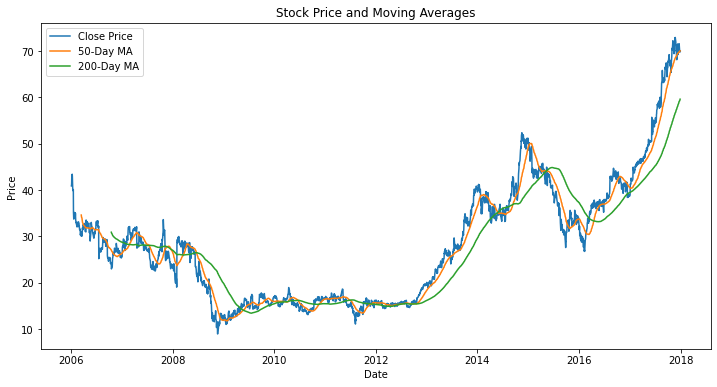

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA')
plt.plot(data['Date'], data['MA_200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Price and Moving Averages')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low']]
y = data['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)